# Análise dos dados de aplicativos de carona 


###### Autor: Rafael Capuano

#### Os dados foram fornecidos no site Kaggle.com
###### link:https://www.kaggle.com/code/nich0047/starter-uber-lyft-cab-prices-592a14e1-d/data

 Esta é uma pequena análise descritiva dos dados referentes ao uso de aplicativos de carona na região de NY,utilizando a linguagem python e suas respectivas bibliotecas pandas, matplotlib e seaborn, podemos analisar os dados,analisa-los, limpa-los e a partir disso,retirar informações úteis.



#### Primeiro passo: Adicionando as bibliotecas.


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats

###### Gerando o Data Frame a partir de um arquivo .csv

Usando a função read_csv do pandas, podemos abrir e ler o arquivo "cab_rides.csv" como um dataframe.A partir dele podemos então resolver analisar os dados.

In [2]:
df=pd.read_csv("cab_rides.csv")

###### Visualizando as primeiras linhas

basta usar a função ".head()", esta função pode receber como argumento o número de linhas que queremos visualizar.

In [3]:
df.head(15)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


##### Visualisizando as últimas linhas.

A função ".tail()" nos permite visualizar as últimas linhas do dataframe, e da mesma forma que a função ".head()" ela e capaz de receber como argumento o número de linhas

In [4]:
df.tail(15)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693056,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,7.0,1.0,d1a50035-184d-4e63-8aa1-813b497e293e,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693057,1.61,Uber,1543456028123,Haymarket Square,Theatre District,17.0,1.0,0f13e495-cd0a-4b87-8219-b9a4ae06ece7,6c84fd89-3f11-4782-9b50-97c468b19529,Black
693058,1.61,Uber,1543456028123,Haymarket Square,Theatre District,22.0,1.0,16ccd6b9-a294-41c1-9827-0e44bd92db15,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693059,1.61,Uber,1543728484149,Haymarket Square,Theatre District,14.0,1.0,178bfa35-7df5-4ef8-a6eb-42a65f95bcce,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693061,1.61,Uber,1543728484149,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693062,1.61,Uber,1543728484149,Haymarket Square,Theatre District,15.0,1.0,64a50889-d05b-49de-b416-1802db5c27ac,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693063,1.61,Uber,1543728484149,Haymarket Square,Theatre District,27.0,1.0,6c1d9207-a9af-431e-a65f-3d9d205f28bf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693064,1.00,Uber,1543728484149,North End,West End,17.0,1.0,25ed29df-4f9c-4aac-8218-681427f1d738,6c84fd89-3f11-4782-9b50-97c468b19529,Black
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV


### Analisando as colunas

 Utilizando a função "info()",podemos  visualizar o tipo de cada coluna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


###### Notamos então, que  existem 6 objetos, 3 tipo float e um inteiro.

### Podemos então começar o procedimento de limpeza do Data Frame.

Primeiramente, analisamos as dimensões do a dataframe através da função shape() e se o mesmo e se o mesmo possuí campos nulos. Para a última , usamos uma combinação de duas funções: a função "isnull()" é capaz de detectar se uma célula é nula, a função "sum()" é capaz de contar quantas células possuem.

In [6]:
df.shape

(693071, 10)

In [7]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

###### Podemos então notar, que existem 55095 valores nulos no campo " price".

#### Lidando com valores nulos.

Existem diversas formas de lidar com valores nulos,podemos simplesmente deletar do data frame, podemos substituir pelo valor mais recorrente, ou substituir pela mediana de valores apresentados pela coluna. Deletar os valores pode resultar em perda de informação valiosa.Portanto a melhor estratégia, na minha opinião será substituir por valores alternativos que não prejudiquem a análise dos dados.

 Nesse caso, substituimos pela média.



In [8]:
df["price"].fillna(df["price"].mean(),inplace=True)
df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

#### Podemos analisar se o data frame possui então valores duplicados, usando a função "duplicated()" e a função "value_counts()"

In [9]:
df.duplicated().sum()


0

Como podemos ver, não possuí duplicatas.

### O que podemos descobrir de útil  com os dados disponíveis?



###  Qual seria o serviço mais caro por km rodado?

Utilizando as bibliotecas matplotlib e seaborn, podemos gerar gráficos, tendo assim uma noção visual das coisas, em ambos os aplicativos, a distância aumenta o preço final como era de se esperar, porém, tenhos que levar algo em conta: Diferentes modalitades tem diferentes preços, o que pode impactar no preço final dependendo de qual modalidade é usada.

Separando os dataframe em dois dataframes em cada empresa, podemos analisar o comportamento dos preços.

Text(0.5, 1.0, 'Lyft')

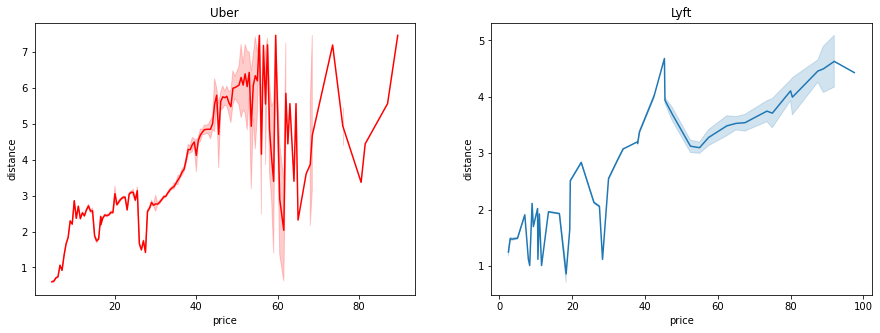

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_uber = df.groupby(['cab_type']).get_group('Uber')
df_Lyft = df.groupby(['cab_type']).get_group('Lyft')

sns.lineplot(ax=axes[0], x=df_uber.price, y=df_uber.distance,color="red").set_title('Uber')

sns.lineplot(ax=axes[1], x=df_Lyft.price, y=df_Lyft.distance).set_title('Lyft')

#### Podemos então descobrir o preço médio de cada modalidade de corrida disponível por aplicativo.

As modalidades Lux Black XL e black SUV são as mais caras em média como mostrado nos gráficos de barras

Text(0.5, 1.0, 'Uber')

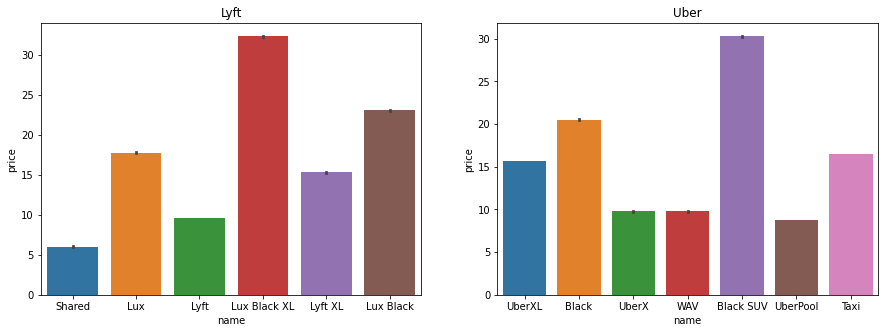

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))



sns.barplot(ax=axes[0] ,x=df_Lyft.name,y=df_Lyft.price,data=df_Lyft ).set_title('Lyft')
sns.barplot(ax=axes[1] ,x=df_uber.name,y=df_uber.price,data=df_uber ).set_title('Uber')

#### Analisando a quantidade de corridas

Se analisarmos utilizando a função "value_counts()" e usarmos a função value_counts(), vemos que não existe diferença entre as modalidas de cada empresa, neste conjunto de dados, em relação ao número de corridas, isso significa que não existem distorções neste ponto, o que é bom.

In [18]:
df['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

Text(0.5, 1.0, 'Uber')

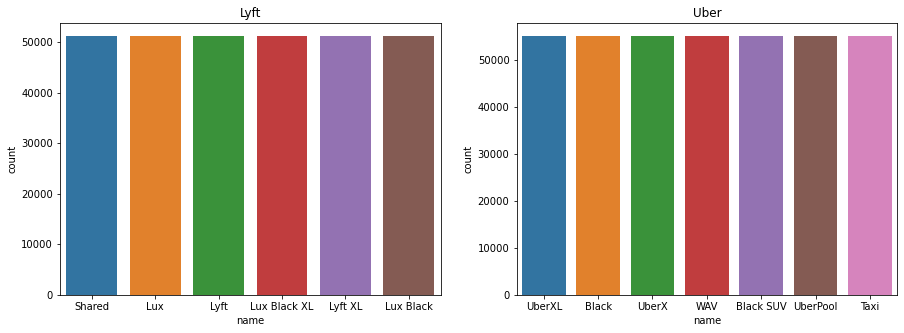

In [16]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))



sns.countplot(ax=axes[0] ,x=df_Lyft.name,data=df_Lyft ).set_title('Lyft')
sns.countplot(ax=axes[1] ,x=df_uber.name,data=df_uber ).set_title('Uber')

### Analisando se existe alguma diferença entre as distâncias percorridas por cada modalidade.

Segundo os dados, não.Se plotarmos um gráfico de barras com a distância percorrida, vemos que a distância média, é a mesma em todas as modalidades.O que isso significa?os preços tambem não são distorcidos por isso.

Text(0.5, 1.0, 'Uber')

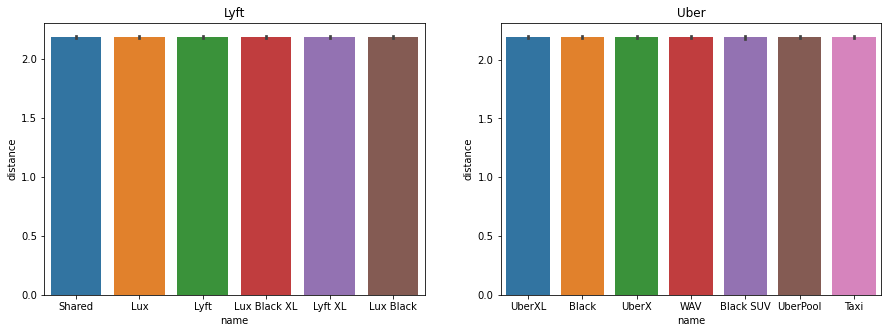

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))



sns.barplot(ax=axes[0] ,x=df_Lyft.name,y=df_Lyft.distance,data=df_Lyft ).set_title('Lyft')
sns.barplot(ax=axes[1] ,x=df_uber.name,y=df_uber.distance,data=df_uber ).set_title('Uber')

### Correlações

Podemos então criar matrizes de correlação para cada uma das empresas, Elas servem para analisarmos as relações entre os fatores utilizados. Podemos então fazer para cada empresa através da função "corr()" e então plotar utilizando a função "background_gradiente"

In [32]:

corr1 =df_Lyft.corr()
corr1.style.background_gradient(cmap='coolwarm')



,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.004085,0.361567,0.040076
time_stamp,0.004085,1.000000,0.001909,0.001093
price,0.361567,0.001909,1.000000,0.308237
surge_multiplier,0.040076,0.001093,0.308237,1.000000


In [30]:
corr2 =df_uber.corr()
corr2.style.background_gradient(cmap='coolwarm')

C:\Users\rafac\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\rafac\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.003165,0.311093,nan
time_stamp,0.003165,1.000000,-0.000211,nan
price,0.311093,-0.000211,1.000000,nan
surge_multiplier,nan,nan,nan,nan


### Analisando as correlações.

Se analisarmos, podemos notar algumas coisas:Primeiro a correlação dos preços com os outros fatores da empresa Lyft são superiores ás correlações da empresa Uber. Então, de fato, a empresa Lyft cobra mais pela distância percorrida, fora os outros fatores, curiosamente, não existe correlação no Surge_Multiplier na empresa uber.